# General Overview

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Understanding

This project is a deep dive into some datasets with information on movies and their reception by the general public. We look mostly into numbers like gross box office, director names, key words, and 

Creating a movie isn't purely a financial venture; there is a high amount of creative freedom needed. 
Creativity is hard to quantize and even harder to mine for data. Thus, we must be content with looking at past works to help us estimate the success of a particular venture. 
However, we must keep in mind the constraints that budgeting, scheduling, and hard deadlines have on a creative endeavor. A good director does not always make an excellent movie, and a creative setting does not always make a compelling journey. 

## Data

Data Sources: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

Source Descriptions: This dataset on the top 5000 movies from IMDB. The dataset contains information helpful to our investigation of the effect a director has on reception by fans and gross box office. It contains Movie ID's based on title and critical information such as Director names, gross domestic box office, and IMDB ratings. 

## Methods



In [2]:
#import libraries that we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Opening and Exploring the Data

In [3]:
#Open the csv in the zippedData folder
df = pd.read_csv('zippedData/imdb-Copy1.kaggle.metadata.zip')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [34]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
pd.set_option('max_columns', None)

In [6]:
#Sorting out only the movies that have enough votes
df_top_scores = df[df['num_voted_users'] > 100000]

In [7]:
#taking out NA director name movies
df_top_scores = df_top_scores[df_top_scores['director_name'].notna()]

In [8]:
#sorting by top 10 imdb score rated movies
df_top_scores.sort_values('imdb_score', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|r...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|mel...,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,650.0,English,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,1.0,black comedy|cunnilingus|neo noir|nonlinear ti...,http://www.imdb.com/title/tt0110912/?ref_=fn_t...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
4822,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,Crime|Drama,Jack Warden,12 Angry Men,447785,1433,John Fiedler,1.0,courtroom|dialogue driven|dialogue driven stor...,http://www.imdb.com/title/tt0050083/?ref_=fn_t...,888.0,English,USA,Not Rated,350000.0,1957.0,259.0,8.9,1.66,40000
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,3189.0,English,USA,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000
1874,Black and White,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96067179.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,15233,Caroline Goodall,0.0,german|german soldier|jew|jewish|nazi,http://www.imdb.com/title/tt0108052/?ref_=fn_t...,1273.0,English,USA,R,22000000.0,1993.0,795.0,8.9,1.85,41000
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37023395.0,Drama,Brad Pitt,Fight Club,1347461,13209,Eugenie Bondurant,2.0,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,2968.0,English,USA,R,63000000.0,1999.0,783.0,8.8,2.35,48000


In [9]:
#getting a list of top 10 directors
top_10_directors = df_top_scores.sort_values('imdb_score', ascending=False).head(10)['director_name'].values

In [10]:
#getting the average imdb score of top 10 directors
dir_avg_score = []

for director in df_top_scores.sort_values('imdb_score', ascending=False).head(10)['director_name'].values: 
    dir_avg_score.append(df[df['director_name'] == director]['imdb_score'].mean())

dir_avg_score

[7.9750000000000005,
 7.418181818181819,
 7.418181818181819,
 8.425,
 8.475,
 8.2,
 7.183333333333334,
 7.675000000000001,
 7.480769230769232,
 7.75]

Text(0, 0.5, 'Average Ratings')

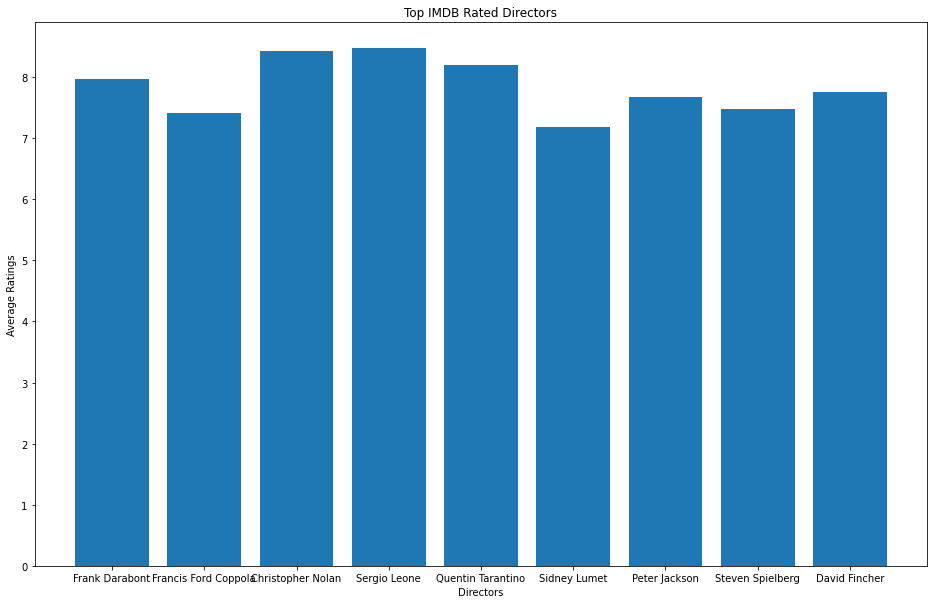

In [11]:
#bar graph of average imdb score of top 10 directors
fig, ax = plt.subplots(figsize=(16,10))

x = top_10_directors
y = dir_avg_score

ax.bar(x, y)
ax.set_title('Top IMDB Rated Directors')
ax.set_xlabel('Directors')
ax.set_ylabel('Average Ratings')

In [12]:
#getting directors with highest imdb score averages
df.groupby('director_name').mean()['imdb_score'].sort_values(ascending=False)

director_name
John Blanchard        9.5
Sadyk Sher-Niyaz      8.7
Mitchell Altieri      8.7
Cary Bell             8.7
Mike Mayhall          8.6
                     ... 
Georgia Hilton        2.2
Vondie Curtis-Hall    2.1
Frédéric Auburtin     2.0
A. Raven Cruz         1.9
Lawrence Kasanoff     1.7
Name: imdb_score, Length: 2398, dtype: float64

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'IMDB Score Average')

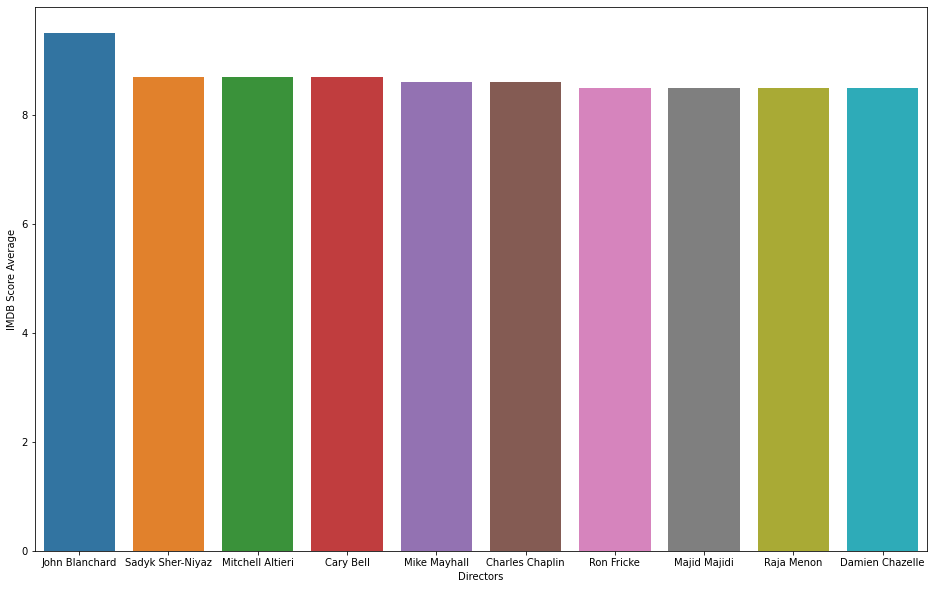

In [13]:
#plotting the top 10 grossing directors and their mean imdb scores
x = df.groupby('director_name').mean()['imdb_score'].sort_values(ascending=False).index[:10]
y = df.groupby('director_name').mean()['imdb_score'].sort_values(ascending=False).values[:10]

fig, ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x, y)
ax.set_xlabel('Directors')
ax.set_ylabel('IMDB Score Average')

In [14]:
#directors with the highest mean gross box office
df.groupby('director_name').mean()['gross'].sort_values(ascending=False)

director_name
Joss Whedon      432721657.0
Lee Unkrich      414984497.0
Chris Buck       400736600.0
Tim Miller       363024263.0
George Lucas     348283696.0
                    ...     
Zack Ward                NaN
Zackary Adler            NaN
Zoran Lisinac            NaN
Éric Tessier             NaN
Étienne Faure            NaN
Name: gross, Length: 2398, dtype: float64

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross Box Office')

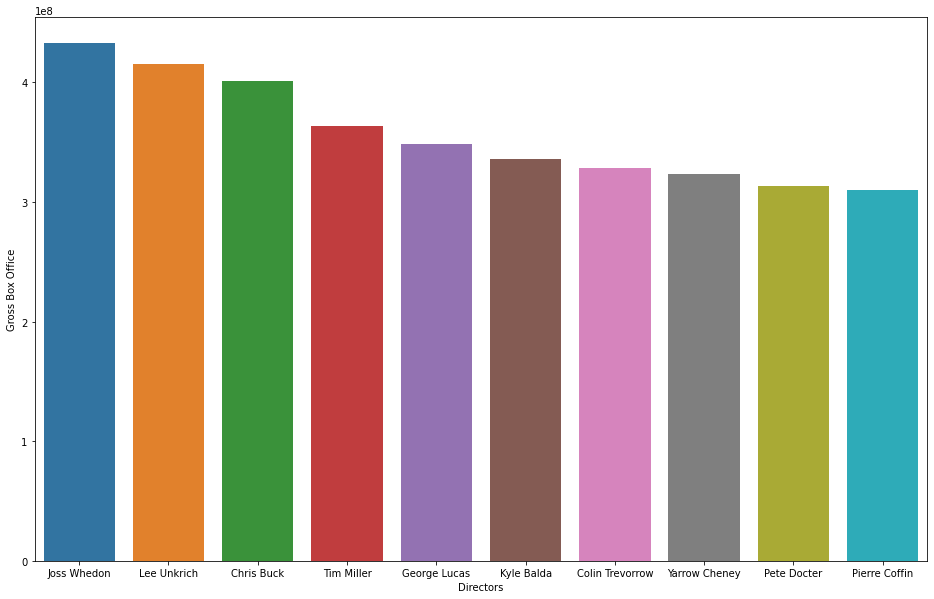

In [16]:
#plotting the top 10 grossing directors and their mean revenue
x = df.groupby('director_name').mean()['gross'].sort_values(ascending=False).index[:10]
y = df.groupby('director_name').mean()['gross'].sort_values(ascending=False).values[:10]

fig, ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x, y)
ax.set_xlabel('Directors')
ax.set_ylabel('Gross Box Office')

In [33]:
x = df.groupby('director_name').mean()['gross'].sort_values(ascending=False)
df[x]

KeyError: "None of [Float64Index([      432721657.0,       414984497.0,       400736600.0,\n                    363024263.0,       348283696.0,       336029560.0,\n                    328092531.5,       323505540.0, 313113780.3333333,\n                    309775640.0,\n              ...\n                            nan,               nan,               nan,\n                            nan,               nan,               nan,\n                            nan,               nan,               nan,\n                            nan],\n             dtype='float64', length=2398)] are in the [columns]"

In [26]:
#making box plots to see variance in movie quality
top_directors = df.groupby('director_name').mean()['gross'].sort_values(ascending=False).index[:10]
y = df[df['director_name' in x]]

fig, ax = plt.subplots(figsize=(16,10))
ax = sns.boxplot(data = df, x = top_directors, y = 'gross')
ax.set_xlabel('Directors')
ax.set_ylabel('Gross Box Office')

KeyError: False

# Conclusion